#AI@amrita Session II
Garrepalli Vaishnavi





# Linear Regression

Case Study: Predict the Sale Price of your House using Machine Learning.

House Prices prediction dataset Description:

Size : (1460X81)

Here's a brief version of the dataset file.

SalePrice :This is the target variable that you're trying to predict.

train.csv - the training set

test.csv - the test set

Some important Data fields

•	SalePrice — the property's sale price in dollars. This is the target variable that you're trying to predict.

•	MSSubClass — The building class

•	MSZoning — The general zoning classification

•	LotFrontage — Linear feet of street connected to property

•	LotArea — Lot size in square feet

•	Street — Type of road access

•	Alley — Type of alley access

•   LotShape — General shape of property

•	LandContour — Flatness of the property

•	Utilities — Type of utilities available

•	LotConfig — Lot configuration

And so on…..

Let’s start!


In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read data
    Use Pandas to read in csv files train.csv and test.csv

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification/Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification/Dataset/test.csv')

#     Observe the data
    
    Let's check out the size of the data.

In [4]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


Next, we'll look at a few rows using the DataFrame.head() method.

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Import Matplotlib for plotting
We want to do some plotting during the exploration stage of our project, and we'll need to import that functionality into our environment as well. Plotting allows us to visualize the distribution of the data, check for outliers, and see other patterns that we might miss otherwise. We'll use Matplotlib, a popular visualization library.


In [6]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

# Analyse data

Series.describe() gives you more information about any series. count displays the total number of rows in the series. For numerical data, Series.describe() also gives the mean, std, min and max values as well.

The average sale price of a house in our dataset is close to 180,000 dollar, with most of the values falling within the 130,000 dollar to 215,000 dollar range.



In [7]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Skew Correction
    Next, we'll check for skewness, which is a measure of the shape of the distribution of values
    
    We use plt.hist() to plot a histogram of SalePrice. Notice that the distribution has a longer tail on the right. The distribution is positively skewed.


•	When performing regression, sometimes it makes sense to log-transform the target variable when it is skewed. One reason for this is to improve the linearity of the data. np.log() will transform the variable, and np.exp() will reverse the transformation. 
•	 Calculate the skewness a second time, as well as re-plot the data. A value closer to 0 means that we have improved the skewness of the data. We can see visually that the data will more resembles a normal distribution.


Skew is: 1.8828757597682129


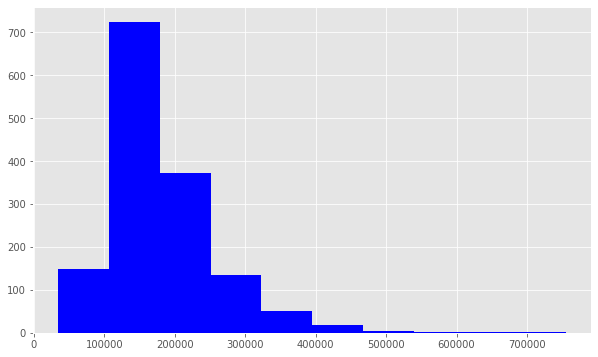

In [8]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

Do the correction with log transform and check the skew once again

Skew is: 0.12133506220520406


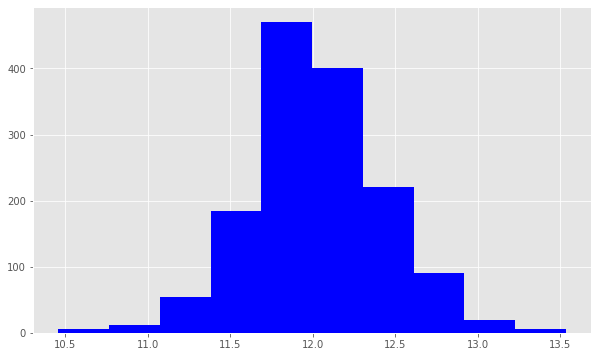

In [9]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

# Working with Numeric Features

pandas.DataFrame.select_dtypes:--prototype

DataFrame.select_dtypes(include=None, exclude=None)

Return a subset of the DataFrame’s columns based on the column dtypes.

Here it returns only the numeric features

In [10]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

# Relationship between features
Next, let's use plt.scatter() to generate some scatter plots and visualize the relationship between the Ground Living Area
GrLivArea and SalePrice.
At first glance, we see that increases in living area correspond to increases in price. We will do the same for GarageArea.

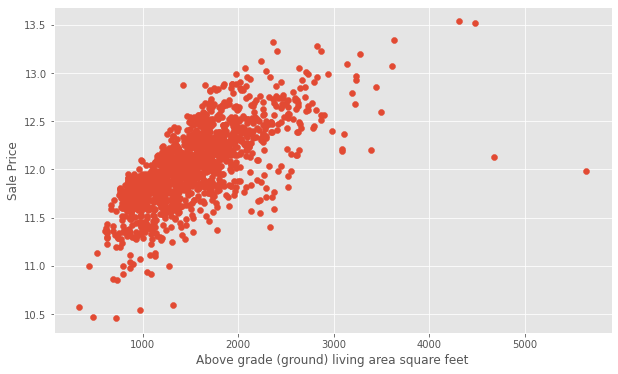

In [11]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

Notice that there are many homes with 0 for Garage Area, indicating that they don't have a garage.
There are a few outliers as well. Outliers can affect a regression model by pulling our estimated regression line further away from the true population regression line. So, we'll remove those 

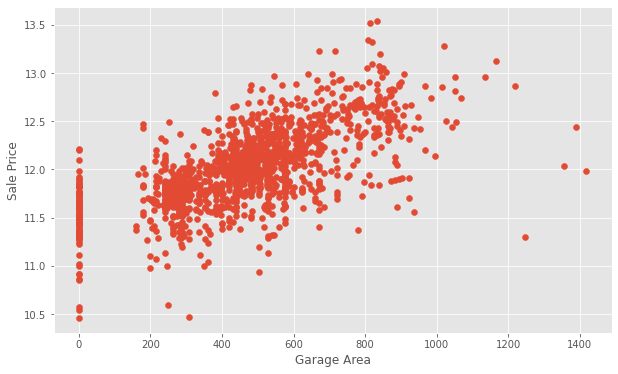

In [12]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

observations from our data. Removing outliers is an art and a science. There are many techniques for dealing with outliers.
We will create a new dataframe with some outliers removed.


In [13]:
train = train[train['GarageArea'] < 1200]

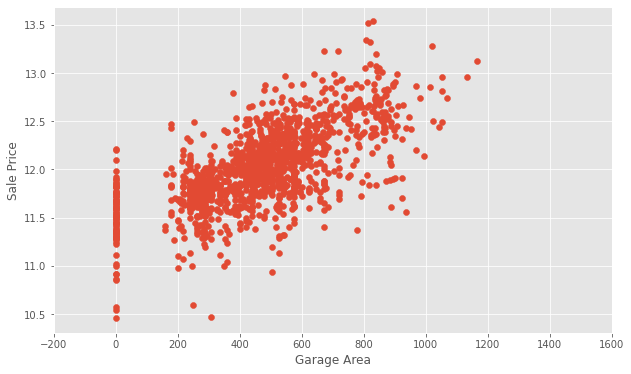

In [14]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

Consider the non-numeric features and display details of columns:

DataFrame.select_dtypes(include=None, exclude=None)
Return a subset of the DataFrame’s columns based on the column dtypes.
The below statement excludes all numerical and displays the categorical



In [15]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1447,1455,1455,1455,1418,1418,1417,1418,1417,1455,1455,1455,1454,1455,1455,766,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,1441,1216,722,1139,1430,514,503,863,905,1278,644,647,1306,951,428,1251,1423,737,1360,1329,733,1355,377,867,605,1306,1321,1335,2,157,48,1266,1196


# Deal with missing data



data = train.select_dtypes(include=[np.number]).interpolate() .


Before we prepare the data for modeling, we need to deal with the missing data. We'll fill the missing values with an average value and then assign the results to data. This is a method of interpolation. The DataFrame.interpolate() method makes this simple.

This is a quick and simple method of dealing with missing values, and might not lead to the best performance of the model on new data. Handling missing values is an important part of the modeling process, where creativity and insight can make a big difference. 


DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)[source]
Remove missing values.



In [16]:
data = train.select_dtypes(include=[np.number]).interpolate()

In [17]:
#data.head

Check if the all of the columns have 0 null values.

sum(data.isnull().sum() != 0)



In [18]:
sum(data.isnull().sum() != 0)

0

# Assign Features to X and Targets to y
 This is an important step of assigning features and targets
 
 Here SalePrice is the target. We also log transform the salePrice to improve performance
 
 Everything other than SalePrice are features

In [19]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [20]:
#X

# Partition data to Train and Test

This is an important step of Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before. If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.

train_test_split() returns four objects:

X_train is the subset of our features used for training.
X_test is the subset which will be our 'hold-out' set - what we'll use to test the model.
y_train is the target variable SalePrice which corresponds to X_train.
y_test is the target variable SalePrice which corresponds to X_test.
The first parameter value X denotes the set of predictor data, and y is the target variable. Next, we set random_state=42. This provides for reproducible results, since sci-kit learn's train_test_split will randomly partition the data. The test_size parameter tells the function what proportion of the data should be in the test partition. In this example, about 20% of the data is devoted to the hold-out set.
Hence the division of training testing splitup is 80% data for training, and 20% for testing

Pls note X and y you have obtained from the previous step

We can also do cross validation here for getting better peformance model.


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=0.33)

# Build a linear model
(a).	Create a Linear Regression model. First, we instantiate the model

In [22]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

(b) Fit the model 

Next, we need to fit the model. Model fitting is a procedure that varies for different types of models. Put simply, we are estimating the relationsh(bip between our predictors and the target variable so we can make accurate predictions on new data.

We fit the model using X_train and y_train, and we'll score with X_test and y_test. The lr.fit() method will fit the linear regression on the features and target variable that we pass.



In [23]:
model = lr.fit(X_train, y_train)

(c).	Prediction 

The model.predict() method will return a list of predictions given a set of predictors. Use model.predict() after fitting the model.

In [24]:
predictions = model.predict(X_test)

# Evaluate the performance and visualize results

root-mean-squared-error (RMSE)


The mean_squared_error function takes two arrays and calculates the rmse.



In [25]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.01819705754249938


# Visualize result

If our predicted values were identical to the actual values, this graph would be the straight line y=x because each predicted value x would be equal to each actual value y.

In [ ]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()